# Regression Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df=pd.read_csv("automobileinsurance.csv")
df

Customer Country State Code     State  Claim Amount Response  Coverage  \
0     BU79786      US         KS    Kansas    276.351928       No     Basic   
1     QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2     AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3     WW63253      US         MO  Missouri    764.586183       No     Basic   
4     HB64268      US         KS    Kansas    281.369258       No     Basic   
...       ...     ...        ...       ...           ...      ...       ...   
9129  LA72316      US         MO  Missouri   2340.598798       No     Basic   
9130  PK87824      US         MO  Missouri    309.651122      Yes  Extended   
9131  TD14365      US         MO  Missouri    816.389043       No  Extended   
9132  UP19263      US         MO  Missouri    752.444244       No  Extended   
9133  Y167826      US         MO  Missouri    261.183687       No  Extended   

     Education Effective To Date EmploymentStatus  ...  \
0     Bachelor           2/24/11         Employed  ...   
1     Bachelor           1/31/11       Unemployed  ...   
2     Bachelor           2/19/11         Employed  ...   
3     Bachelor           1/20/11       Unemployed  ...   
4     Bachelor            2/3/11         Employed  ...   
...        ...               ...              ...  ...   
9129  Bachelor           2/10/11         Employed  ...   
9130   College           2/12/11         Employed  ...   
9131  Bachelor            2/6/11       Unemployed  ...   
9132   College            2/3/11         Employed  ...   
9133   College           2/14/11       Unemployed  ...   

     Months Since Policy Inception  Number of Open Complaints  \
0                                5                          0   
1                               42                          0   
2                               38                          0   
3                               65                          0   
4                               44                          0   
...                            ...                        ...   
9129                            89                          0   
9130                            28                          0   
9131                            37                          3   
9132                             3                          0   
9133                            90                          0   

     Number of Policies     Policy Type        Policy  Claim Reason  \
0                     1  Corporate Auto  Corporate L3     Collision   
1                     8   Personal Auto   Personal L3  Scratch/Dent   
2                     2   Personal Auto   Personal L3     Collision   
3                     7  Corporate Auto  Corporate L2     Collision   
4                     1   Personal Auto   Personal L1     Collision   
...                 ...             ...           ...           ...   
9129                  2   Personal Auto   Personal L1          Hail   
9130                  1  Corporate Auto  Corporate L3     Collision   
9131                  2  Corporate Auto  Corporate L2     Collision   
9132                  3   Personal Auto   Personal L2  Scratch/Dent   
9133                  1  Corporate Auto  Corporate L3         Other   

      Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0             Agent          384.811147   Two-Door Car      Medsize  
1             Agent         1131.464935  Four-Door Car      Medsize  
2             Agent          566.472247   Two-Door Car      Medsize  
3       Call Center          529.881344            SUV      Medsize  
4             Agent          138.130879  Four-Door Car      Medsize  
...             ...                 ...            ...          ...  
9129            Web          198.234764  Four-Door Car      Medsize  
9130         Branch          379.200000  Four-Door Car      Medsize  
9131         Branch          790.784983  Four-Door Car      Medsize  
9132         Branch      

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Country                        9134 non-null   object 
 2   State Code                     9134 non-null   object 
 3   State                          9134 non-null   object 
 4   Claim Amount                   9134 non-null   float64
 5   Response                       9134 non-null   object 
 6   Coverage                       9134 non-null   object 
 7   Education                      9134 non-null   object 
 8   Effective To Date              9134 non-null   object 
 9   EmploymentStatus               9134 non-null   object 
 10  Gender                         9134 non-null   object 
 11  Income                         9134 non-null   int64  
 12  Location Code                  9134 non-null   o

In [4]:
cf=[]
nf=[] 
for fea in df.columns:
    if df[fea].dtype == 'O':
            cf.append(fea)
    else:
            nf.append(fea)
print(cf)
print('\n',nf)

['Customer', 'Country', 'State Code', 'State', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Claim Reason', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

 ['Claim Amount', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


In [5]:
print('No of numerical features: ',len(nf))
print('No of categorical features: ',len(cf))

No of numerical features:  8
No of categorical features:  18


In [6]:
for col in cf:
    print(df[col].value_counts())  

AS26192    1
RD73104    1
YN10988    1
QZ71100    1
NT75612    1
          ..
AV49798    1
MF87270    1
WM25415    1
LQ23049    1
AO40386    1
Name: Customer, Length: 9134, dtype: int64
US    9134
Name: Country, dtype: int64
MO    3150
IA    2601
NE    1703
OK     882
KS     798
Name: State Code, dtype: int64
Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma     882
Kansas       798
Name: State, dtype: int64
No     7826
Yes    1308
Name: Response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/3/11     178
1/31/11    178
1/20/11    173
1/28/11    169
2/26/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161


In [7]:
for col in nf:
    print(col,' : ',df[col].nunique()) 

Claim Amount  :  8041
Income  :  5694
Monthly Premium Auto  :  202
Months Since Last Claim  :  36
Months Since Policy Inception  :  100
Number of Open Complaints  :  6
Number of Policies  :  9
Total Claim Amount  :  5106


In [8]:
df.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

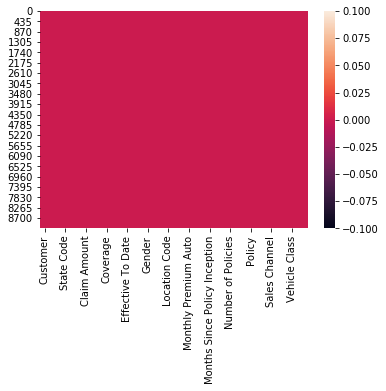

In [9]:
sns.heatmap(df.isnull())
plt.show()

# Statistics Summary

In [10]:
df.describe()

Claim Amount        Income  Monthly Premium Auto  \
count   9134.000000   9134.000000           9134.000000   
mean     800.494047  37657.380009             93.219291   
std      687.096761  30379.904734             34.407967   
min      189.800768      0.000000             61.000000   
25%      399.425179      0.000000             68.000000   
50%      578.018220  33889.500000             83.000000   
75%      896.216704  62320.000000            109.000000   
max     8332.538119  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

In [11]:
df.describe(include = ['O'])

Customer Country State Code     State Response Coverage Education  \
count      9134    9134       9134      9134     9134     9134      9134   
unique     9134       1          5         5        2        3         5   
top     AS26192      US         MO  Missouri       No    Basic  Bachelor   
freq          1    9134       3150      3150     7826     5568      2748   

       Effective To Date EmploymentStatus Gender Location Code Marital Status  \
count               9134             9134   9134          9134           9134   
unique                59                5      2             3              3   
top              1/10/11         Employed      F      Suburban        Married   
freq                 195             5698   4658          5779           5298   

          Policy Type       Policy Claim Reason Sales Channel  Vehicle Class  \
count            9134         9134         9134          9134           9134   
unique              3            9            4             4              6   
top     Personal Auto  Personal L3    Collision         Agent  Four-Door Car   
freq             6788         3426         3752          3477           4621   

       Vehicle Size  
count          9134  
unique            3  
top         Medsize  
freq           6424

In [12]:
df=df.drop(columns=['Country'], axis=1)
df.head()

Customer State Code     State  Claim Amount Response  Coverage Education  \
0  BU79786         KS    Kansas    276.351928       No     Basic  Bachelor   
1  QZ44356         NE  Nebraska    697.953590       No  Extended  Bachelor   
2  AI49188         OK  Oklahoma   1288.743165       No   Premium  Bachelor   
3  WW63253         MO  Missouri    764.586183       No     Basic  Bachelor   
4  HB64268         KS    Kansas    281.369258       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  ...  \
0           2/24/11         Employed      F  ...   
1           1/31/11       Unemployed      F  ...   
2           2/19/11         Employed      F  ...   
3           1/20/11       Unemployed      M  ...   
4            2/3/11         Employed      M  ...   

   Months Since Policy Inception Number of Open Complaints Number of Policies  \
0                              5                         0                  1   
1                             42                         0                  8   
2                             38                         0                  2   
3                             65                         0                  7   
4                             44                         0                  1   

      Policy Type        Policy  Claim Reason  Sales Channel  \
0  Corporate Auto  Corporate L3     Collision          Agent   
1   Personal Auto   Personal L3  Scratch/Dent          Agent   
2   Personal Auto   Personal L3     Collision          Agent   
3  Corporate Auto  Corporate L2     Collision    Call Center   
4   Personal Auto   Personal L1     Collision          Agent   

   Total Claim Amount  Vehicle Class Vehicle Size  
0          384.811147   Two-Door Car      Medsize  
1         1131.464935  Four-Door Car      Medsize  
2          566.472247   Two-Door Car      Medsize  
3          529.881344            SUV      Medsize  
4          138.130879  Four-Door Car      Medsize  

[5 rows x 25 columns]

In [13]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [14]:
df.head()

Customer  State Code  State  Claim Amount  Response  Coverage  Education  \
0       600           1      1    276.351928         0         0          0   
1      5946           3      3    697.953590         0         1          0   
2        96           4      4   1288.743165         0         2          0   
3      8016           2      2    764.586183         0         0          0   
4      2488           1      1    281.369258         0         0          0   

   Effective To Date  EmploymentStatus  Gender  ...  \
0                 47                 1       0  ...   
1                 24                 4       0  ...   
2                 41                 1       0  ...   
3                 12                 4       1  ...   
4                 52                 1       1  ...   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies  Policy Type  Policy  Claim Reason  Sales Channel  \
0                   1            0       2             0              0   
1                   8            1       5             3              0   
2                   2            1       5             0              0   
3                   7            0       1             0              2   
4                   1            1       3             0              0   

   Total Claim Amount  Vehicle Class  Vehicle Size  
0          384.811147              5             1  
1         1131.464935              0             1  
2          566.472247              5             1  
3          529.881344              3             1  
4          138.130879              0             1  

[5 rows x 25 columns]

# Data visualisation

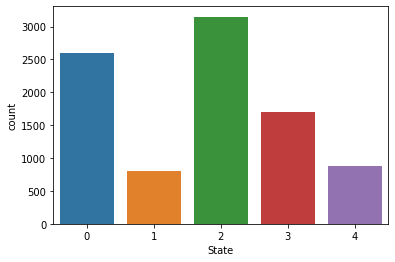

In [15]:
#univarite analysis
sns.countplot(df['State'])
plt.show()

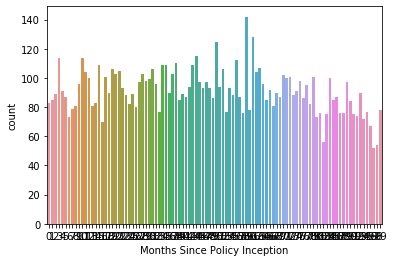

In [16]:
sns.countplot(df['Months Since Policy Inception'])
plt.show()

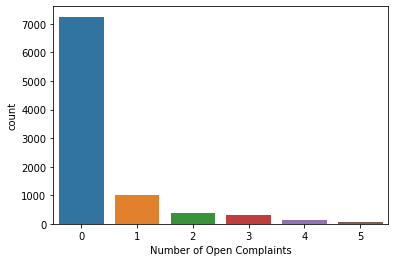

In [17]:
sns.countplot(df['Number of Open Complaints'])
plt.show()

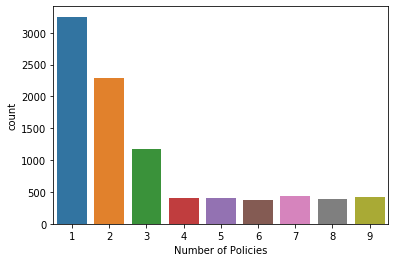

In [18]:
sns.countplot(df['Number of Policies'])
plt.show()

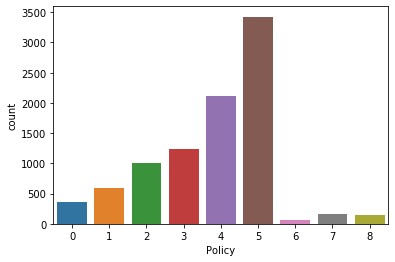

In [19]:
sns.countplot(df['Policy'])
plt.show()

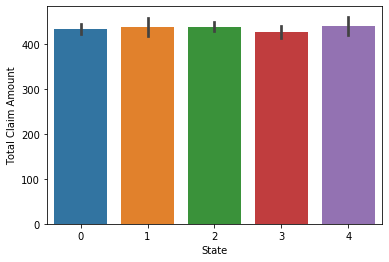

In [20]:
#bivariate analysis
sns.barplot(x='State',y='Total Claim Amount',data=df) 
plt.show()

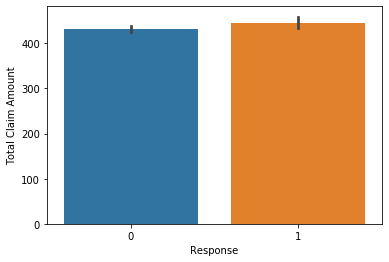

In [21]:
sns.barplot(x='Response',y='Total Claim Amount',data=df) 
plt.show()

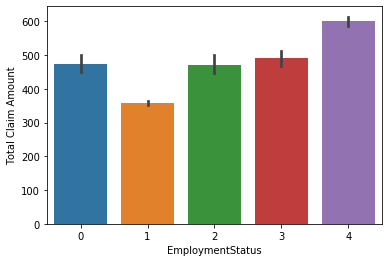

In [22]:
sns.barplot(x='EmploymentStatus',y='Total Claim Amount',data=df) 
plt.show()

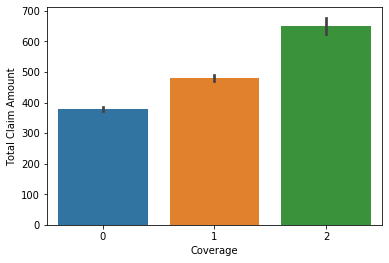

In [23]:
sns.barplot(x='Coverage',y='Total Claim Amount',data=df) 
plt.show()

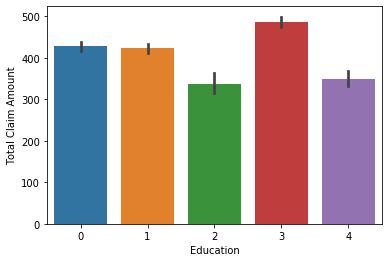

In [24]:
sns.barplot(x='Education',y='Total Claim Amount',data=df) 
plt.show()

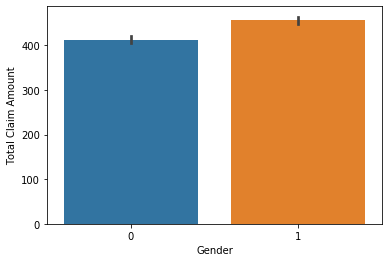

In [25]:
sns.barplot(x='Gender',y='Total Claim Amount',data=df) 
plt.show()

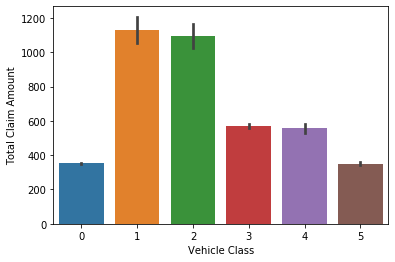

In [26]:
sns.barplot(x='Vehicle Class',y='Total Claim Amount',data=df) 
plt.show()

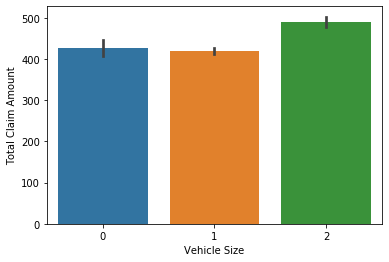

In [27]:
sns.barplot(x='Vehicle Size',y='Total Claim Amount',data=df) 
plt.show()

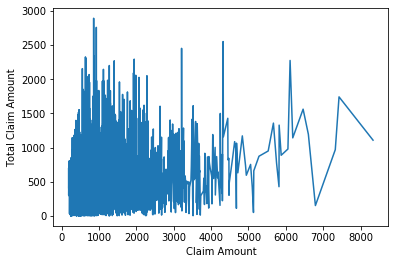

In [28]:
sns.lineplot(x='Claim Amount',y='Total Claim Amount',data=df) 
plt.show()

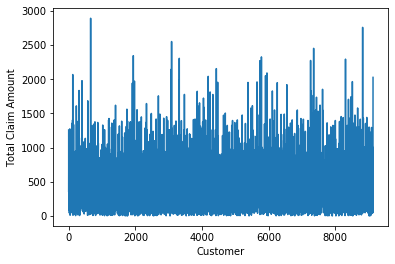

In [29]:
sns.lineplot(x='Customer',y='Total Claim Amount',data=df) 
plt.show()

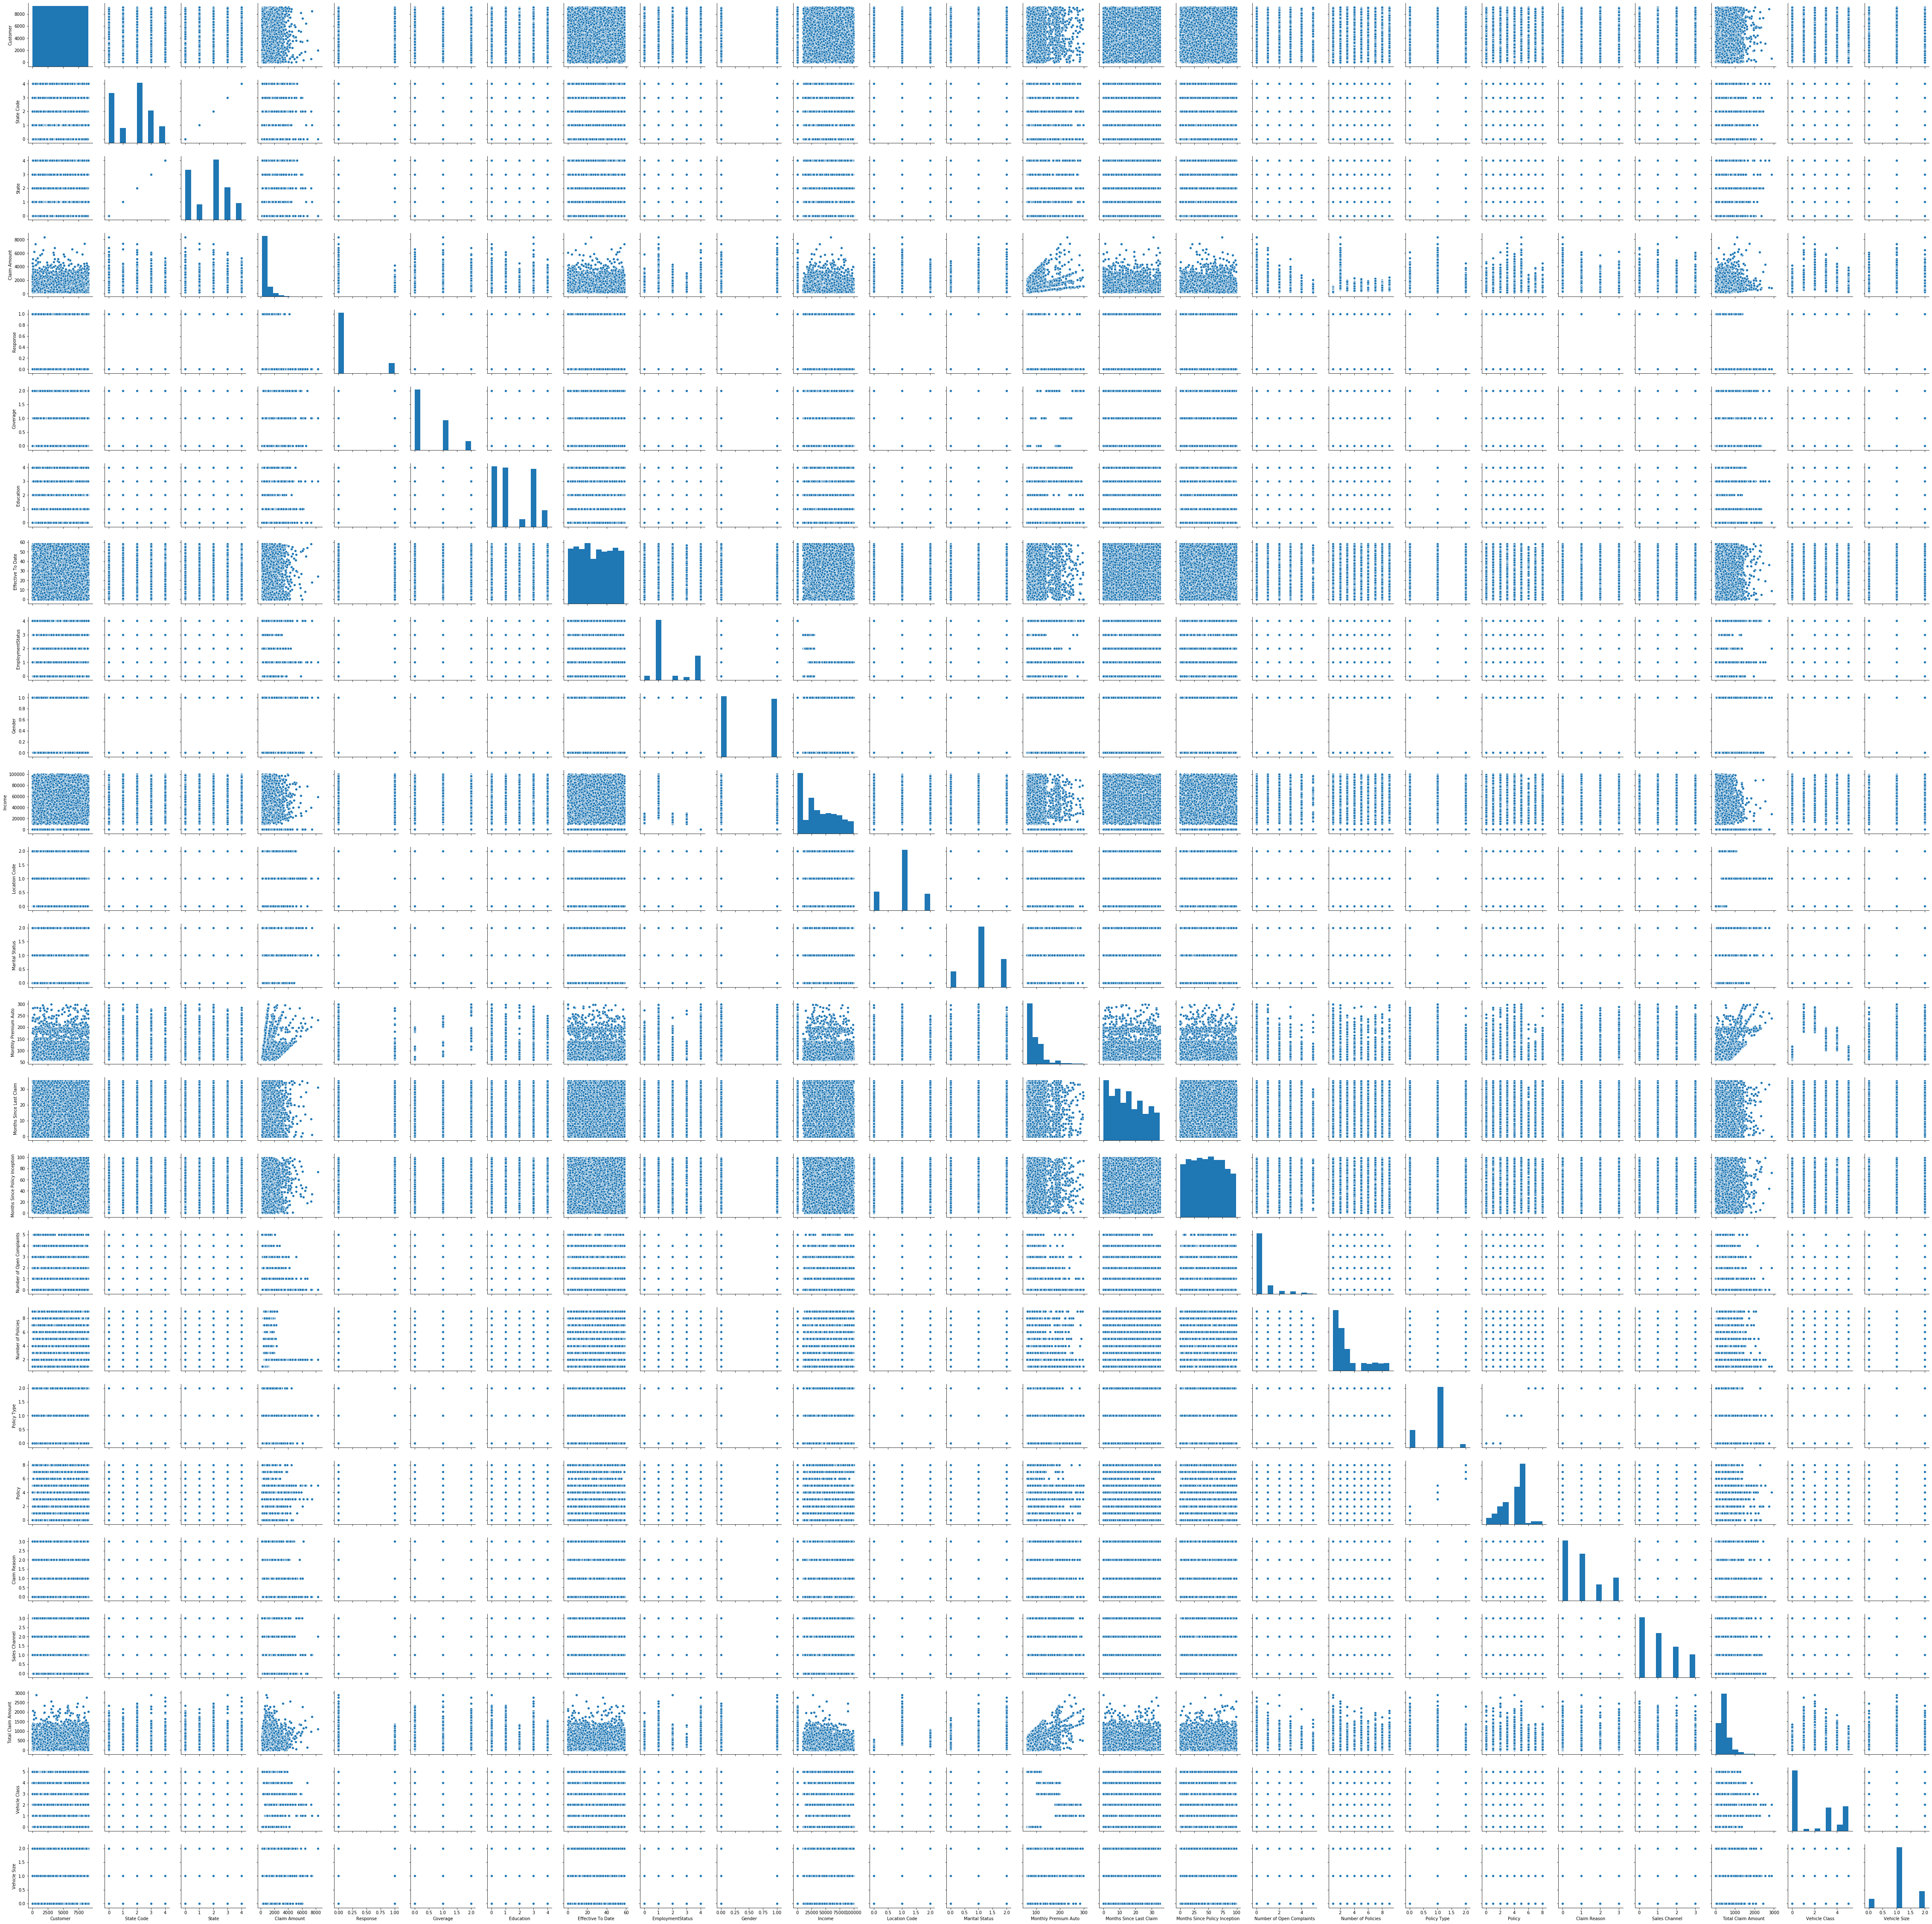

In [30]:
sns.pairplot(data=df) 
plt.show()

In [31]:
#correlation matrix
df.corr()

Customer  State Code     State  Claim Amount  \
Customer                       1.000000   -0.002256 -0.002256     -0.028605   
State Code                    -0.002256    1.000000  1.000000     -0.006629   
State                         -0.002256    1.000000  1.000000     -0.006629   
Claim Amount                  -0.028605   -0.006629 -0.006629      1.000000   
Response                       0.023256   -0.001732 -0.001732     -0.008930   
Coverage                      -0.005677    0.007558  0.007558      0.168040   
Education                      0.004083    0.004256  0.004256      0.026038   
Effective To Date             -0.003460   -0.000448 -0.000448     -0.012978   
EmploymentStatus               0.010265   -0.004054 -0.004054     -0.034846   
Gender                         0.018435    0.000545  0.000545     -0.013610   
Income                        -0.008700    0.002682  0.002682      0.024366   
Location Code                  0.016476    0.001382  0.001382      0.004854   
Marital Status                 0.001184   -0.008975 -0.008975     -0.026003   
Monthly Premium Auto           0.002520   -0.005549 -0.005549      0.396262   
Months Since Last Claim        0.012043    0.009249  0.009249      0.011517   
Months Since Policy Inception -0.007422   -0.004459 -0.004459      0.009418   
Number of Open Complaints     -0.012298    0.014814  0.014814     -0.036343   
Number of Policies             0.007423   -0.005993 -0.005993      0.021955   
Policy Type                   -0.018684   -0.009102 -0.009102      0.020011   
Policy                        -0.016986   -0.014193 -0.014193      0.015217   
Claim Reason                   0.002539    0.001845  0.001845     -0.052004   
Sales Channel                 -0.008232    0.002662  0.002662     -0.003941   
Total Claim Amount             0.007607   -0.000816 -0.000816      0.226451   
Vehicle Class                 -0.003413   -0.004813 -0.004813      0.082307   
Vehicle Size                   0.000412   -0.000956 -0.000956      0.017098   

                               Response  Coverage  Education  \
Customer                       0.023256 -0.005677   0.004083   
State Code                    -0.001732  0.007558   0.004256   
State                         -0.001732  0.007558   0.004256   
Claim Amount                  -0.008930  0.168040   0.026038   
Response                       1.000000  0.000642   0.000285   
Coverage                       0.000642  1.000000   0.021573   
Education                      0.000285  0.021573   1.000000   
Effective To Date             -0.043133  0.005482   0.001276   
EmploymentStatus              -0.016703  0.003239  -0.025271   
Gender                         0.004396 -0.014448   0.002206   
Income                         0.011932 -0.010646   0.018709   
Location Code                  0.001729 -0.020176  -0.011533   
Marital Status                -0.094843  0.002956   0.005675   
Monthly Premium Auto           0.010966  0.458997   0.023952   
Months Since Last Claim       -0.016597  0.016925   0.003021   
Months Since Policy Inception  0.002952  0.010658   0.004140   
Number of Open Complaints     -0.009881 -0.007971  -0.023270   
Number of Policies            -0.020891 -0.013515   0.007266   
Policy Type                    0.001110  0.001469   0.011650   
Policy                        -0.001461 -0.002317   0.011119   
Claim Reason                  -0.161332 -0.041627   0.049994   
Sales Channel                 -0.086607 -0.024638  -0.005018   
Total Claim Amount             0.016877  0.279078   0.020730   
Vehicle Class                  0.021225 -0.017682   0.010192   
Vehicle Size                  -0.050691 -0.003775  -0.005491   

                               Effective To Date  EmploymentStatus    Gender  \
Customer                               -0.003460          0.010265  0.018435   
State Code                             -0.000448         -0.004054  0.000545   
State                                  -0.000448         -0.004054  0.0

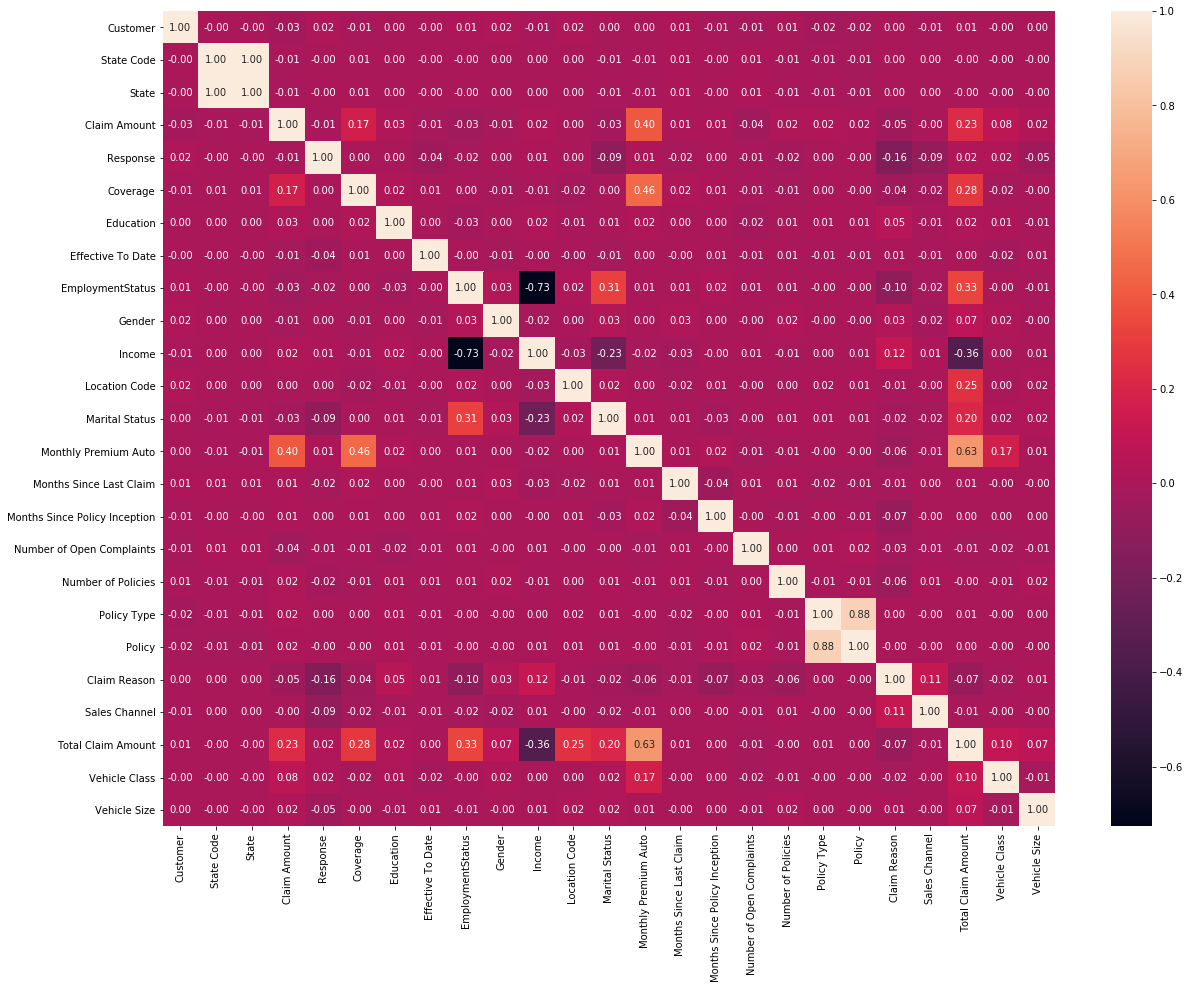

In [32]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

# Data Cleaning

<Figure size 1440x1080 with 0 Axes>

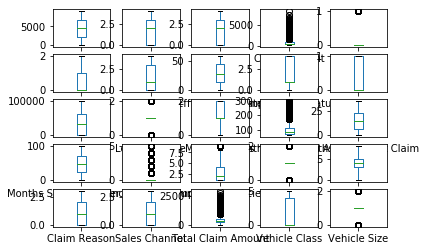

In [33]:
plt.figure(figsize=(20,15))
df.plot(kind='box',subplots=True,layout=(5,5)) 
plt.show()

In [34]:
from scipy.stats import zscore # removing outliers
z=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z<3).all(axis=1)]
print(df_final.shape)
df=df_final

(9134, 25)
(8470, 25)


In [35]:
y=df["Total Claim Amount"]
dfx=df.drop(columns=['Total Claim Amount'], axis=1)
y.unique()

array([ 384.811147, 1131.464935,  566.472247, ...,  541.282007,
        198.234764,  790.784983])

In [36]:
dfx.skew()

Customer                        -0.003693
State Code                       0.019194
State                            0.019194
Claim Amount                     1.848796
Response                         2.030625
Coverage                         1.080580
Education                        0.337866
Effective To Date                0.031848
EmploymentStatus                 0.844023
Gender                           0.044411
Income                           0.282827
Location Code                    0.012291
Marital Status                  -0.099961
Monthly Premium Auto             1.330466
Months Since Last Claim          0.283606
Months Since Policy Inception    0.049470
Number of Open Complaints        2.574570
Number of Policies               1.226531
Policy Type                     -0.459843
Policy                          -0.415012
Claim Reason                     0.725402
Sales Channel                    0.503296
Vehicle Class                    0.403978
Vehicle Size                     0

In [37]:
# handling skewness
from scipy.stats import boxcox
for col in dfx.columns:
    if dfx.skew().loc[col]>0.55:
        dfx[col]=np.log1p(dfx[col])

In [38]:
dfx.skew()

Customer                        -0.003693
State Code                       0.019194
State                            0.019194
Claim Amount                     0.359738
Response                         2.030625
Coverage                         0.749906
Education                        0.337866
Effective To Date                0.031848
EmploymentStatus                 0.404705
Gender                           0.044411
Income                           0.282827
Location Code                    0.012291
Marital Status                  -0.099961
Monthly Premium Auto             0.695535
Months Since Last Claim          0.283606
Months Since Policy Inception    0.049470
Number of Open Complaints        2.028948
Number of Policies               0.638404
Policy Type                     -0.459843
Policy                          -0.415012
Claim Reason                     0.213088
Sales Channel                    0.503296
Vehicle Class                    0.403978
Vehicle Size                     0

In [39]:
dfx.head()

Customer  State Code  State  Claim Amount  Response  Coverage  Education  \
0       600           1      1      5.625287       0.0  0.000000          0   
1      5946           3      3      6.549584       0.0  0.693359          0   
2        96           4      4      7.162198       0.0  1.098633          0   
3      8016           2      2      6.640642       0.0  0.000000          0   
4      2488           1      1      5.643216       0.0  0.000000          0   

   Effective To Date  EmploymentStatus  Gender  ...  Months Since Last Claim  \
0                 47          0.693359       0  ...                       32   
1                 24          1.609375       0  ...                       13   
2                 41          0.693359       0  ...                       18   
3                 12          1.609375       1  ...                       18   
4                 52          0.693359       1  ...                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                        0.0   
1                             42                        0.0   
2                             38                        0.0   
3                             65                        0.0   
4                             44                        0.0   

   Number of Policies  Policy Type  Policy  Claim Reason  Sales Channel  \
0            0.693147            0       2      0.000000              0   
1            2.197225            1       5      1.386719              0   
2            1.098612            1       5      0.000000              0   
3            2.079442            0       1      0.000000              2   
4            0.693147            1       3      0.000000              0   

   Vehicle Class  Vehicle Size  
0              5             1  
1              0             1  
2              5             1  
3              3             1  
4              0             1  

[5 rows x 24 columns]

In [40]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(dfx)
x=pd.DataFrame(x,columns=dfx.columns)
x.head()

Customer  State Code     State  Claim Amount  Response  Coverage  \
0 -1.509583   -0.551121 -0.551121     -1.295202 -0.409822 -0.751509   
1  0.520016    0.974119  0.974119      0.271404 -0.409822  1.011404   
2 -1.700926    1.736738  1.736738      1.309734 -0.409822  2.041839   
3  1.305888    0.211499  0.211499      0.425739 -0.409822 -0.751509   
4 -0.792807   -0.551121 -0.551121     -1.264814 -0.409822 -0.751509   

   Education  Effective To Date  EmploymentStatus    Gender  ...  \
0  -1.120269           1.079811         -0.538227 -0.978045  ...   
1  -1.120269          -0.273905          1.522752 -0.978045  ...   
2  -1.120269           0.726668         -0.538227 -0.978045  ...   
3  -1.120269          -0.980192          1.522752  1.022448  ...   
4  -1.120269           1.374098         -0.538227  1.022448  ...   

   Months Since Last Claim  Months Since Policy Inception  \
0                 1.683302                      -1.535241   
1                -0.204683                      -0.208285   
2                 0.292155                      -0.351739   
3                 0.292155                       0.616580   
4                -0.304051                      -0.136557   

   Number of Open Complaints  Number of Policies  Policy Type    Policy  \
0                  -0.454532           -1.010617    -1.717870 -1.109423   
1                  -0.454532            1.818620     0.372999  0.755394   
2                  -0.454532           -0.247919     0.372999  0.755394   
3                  -0.454532            1.597065    -1.717870 -1.731029   
4                  -0.454532           -1.010617     0.372999 -0.487818   

   Claim Reason  Sales Channel  Vehicle Class  Vehicle Size  
0     -1.084894      -1.035286       1.478254     -0.162023  
1      1.568109      -1.035286      -0.892124     -0.162023  
2     -1.084894      -1.035286       1.478254     -0.162023  
3     -1.084894       0.836205       0.530103     -0.162023  
4     -1.084894      -1.035286      -0.892124     -0.162023  

[5 rows x 24 columns]

# Prediction for Insurance Amount Claim

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [42]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(5674, 24) (2796, 24)
(5674,) (2796,)


In [43]:
maxrscore=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=r_state)
    reg=linear_model.LinearRegression()
    reg.fit(x_train,y_train)
    y_pred= reg.predict(x_test)
    r2s=r2_score(y_test,y_pred)
    if r2s > maxrscore:
        maxrscore=r2s
        fr_state=r_state
print("max r2 score corresponding to ",fr_state," is ",maxrscore)

max r2 score corresponding to  79  is  0.5457764167291967


In [44]:
parameter = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10]}
svr = SVR()
grid = GridSearchCV( estimator=SVR(), param_grid = parameter)
grid.fit(x, y)
print(grid)
#print(grid.best_score)
print(grid.best_estimator_.kernel)
print(grid.best_params_)
s=grid.best_estimator_.kernel

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
rbf
{'C': 10, 'kernel': 'rbf'}


In [45]:
parameter = {'n_neighbors':(3,5,7,9,11), 'weights':['uniform','distance']}
knn = KNeighborsRegressor()
grid = GridSearchCV( estimator=knn, param_grid = parameter)
grid.fit(x, y)
print(grid)
#print(grid.best_score)
print(grid.best_estimator_.n_neighbors)
print(grid.best_estimator_.weights)
print(grid.best_params_)
k=grid.best_estimator_.n_neighbors
w=grid.best_estimator_.weights

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': (3, 5, 7, 9, 11),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
9
distance
{'n_neighbors': 9, 'weights': 'distance'}


In [46]:
KNR=KNeighborsRegressor(n_neighbors=k,weights=w)
SV=SVR(kernel=s)
LR=LinearRegression()
LAR=Lasso()
RR=Ridge()
DT=DecisionTreeRegressor(random_state=fr_state)
RFR=RandomForestRegressor(random_state=fr_state)
ABR=AdaBoostRegressor(random_state=fr_state)
GBR=GradientBoostingRegressor(random_state=fr_state)

In [47]:
models = []
models.append(('KNeighborsRegressor', KNR))
models.append(('SVR', SV))
models.append(('LinearRegression', LR))
models.append(('LassoRegression', LAR))
models.append(('RidgeRegressor', RR))
models.append(('DecisionTreeRegressor', DT))
models.append(('RandomForestRegressor', RFR))
models.append(('AdaBoostRegressor', ABR))
models.append(('GradientBoostingRegressor',GBR))

In [48]:
Model = []
rmse = []
cvs=[]
r2score=[]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=fr_state)
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    y_pred=model.predict(x_test)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='r2').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    print("error:")
    r2s=r2_score(y_test,y_pred)
    print("r2 score is: ",r2s)
    r2score.append(r2s)
    print('\n')
    rmse1=np.sqrt(mean_squared_error(y_test,y_pred))
    print("root Mean squared error: ",rmse1)
    rmse.append(rmse1)
    print('\n')

*********************** KNeighborsRegressor ***********************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='distance')


Cross_Val_Score =  0.6349854266337812


error:
r2 score is:  0.6237807043595063


root Mean squared error:  145.4288214730963


*********************** SVR ***********************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Cross_Val_Score =  0.29665253884229337


error:
r2 score is:  0.24915342194458656


root Mean squared error:  205.44972042393283


*********************** LinearRegression ***********************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


Cross_Val_Score =  0.5206367318688875


error:
r2 score is:  0.5457764167291967


root Mean squared error:  159.79559059459055


*

In [49]:
result = pd.DataFrame({'Model': Model, 'Cross_val_score':cvs,'r2_score':r2score,'root_mean_squared_error':rmse})
result

Model  Cross_val_score  r2_score  \
0        KNeighborsRegressor         0.634985  0.623781   
1                        SVR         0.296653  0.249153   
2           LinearRegression         0.520637  0.545776   
3            LassoRegression         0.521010  0.545131   
4             RidgeRegressor         0.520637  0.545764   
5      DecisionTreeRegressor         0.661235  0.668602   
6      RandomForestRegressor         0.830494  0.840986   
7          AdaBoostRegressor         0.712106  0.726371   
8  GradientBoostingRegressor         0.820390  0.837656   

   root_mean_squared_error  
0               145.428821  
1               205.449720  
2               159.795591  
3               159.909141  
4               159.797788  
5               136.491299  
6                94.547035  
7               124.025400  
8                95.531763

# Saving the best model

In [50]:
from sklearn.externals import joblib

In [51]:
joblib.dump(RFR,'autoinsamt.pkl')

['autoinsamt.pkl']

In [52]:
model=joblib.load('autoinsamt.pkl')

In [53]:
model.predict(x_test.head())

array([ 86.21170172, 480.70443428, 817.95854407, 563.60356011,
       566.52371113])